# Decision Tree (Дерево решений)

Рассмотрим на примере конкретной задачи.

**Выиграет ли `Зенит` свой следующий матч?**
**Параметры**:
* Выше ли находится соперник по турнирной таблице
* Дома ли играется матч
* Пропускает ли матч кто-то из лидеров команды
* Наличие дождя

Есть информация об исходах нескольких матчей и планируется создать модель, предсказывающую исход следующего матча, параметры которого ещё не встречались.

Что из себя представляет задача?
* Классификация данных
* Аппроксимация заданной функции

Имеется *частично* заданная функция $f$ и хотим понять как она работает на ещё не известных параметрах

На дереве решений есть метки:
* В узлах, не являющихся листьями: атрибуты, по которым случаи различаются
* В листьях: значения целевой функции
* На ребрах: значения атрибута, из которого исходит ребро

Для классификации нового случая, необходимо спуститься по дереву с учетом критериев разделения до листа и выдать соответствующее значение.

**Исходная Таблица**
Как играет "Зенит"

|Соперник|Играем|Лидеры|Дождь|Победа|
|---|---|---|---|---|
|Выше|Дома|На месте|Да|Нет|
|Выше|Дома|На месте|Нет|Да|
|Выше|Дома|Пропускают|Нет|Да|
|Ниже|Дома|Пропускают|Нет|Да|
|Ниже|В гостях|Пропускают|Нет|Нет|
|Ниже|Дома|Пропускают|Да|Да|
|Выше|В гостях|На месте|Да|Нет|
|Ниже|В гостях|На месте|Нет|?|



**Как использовать**:
Соперник = Ниже
Играем = В гостях
Лидеры = На месте
Дождь = Нет
Победа = ?

Спускаемся по дереву, переходя по нужным ребрам и получаем, что этот матч "Зенит" должен проиграть.

Для создания модели `Дерево решений` используем `DecisionTreeClassifier` из библиотеки `sklearn`. У объекта этого класса есть следующие атрибуты: 
    <p><b>class_weight</b> - веса классов. Если не указано, значит классы должны иметь один вес;</p>
    <p><b>criterion</b> - функция для измерения качества разбиения;</p>
    <p><b>max_depth</b> - максимальная глубина дерева;</p>
    <p><b>max_leaf_nodes</b> - количество листовых узлов. Если None, значит число не ограничено;</p>
    <p><b>min_impurity_decrease</b> - узел разбивается, если это разбиение уменьшает ошибку, большую или равную этому значению;</p>
    <p><b>min_impurity_split</b> - порог для ранней остановки увеличения дерева;</p>
    <p><b>min_samples_leaf</b> - минимальное количество элементов выборки, которые должны быть у листового узла;<p>
    <p><b>min_samples_split</b> - минимальное количество выборок, необходимых для разделения внутреннего узла;</p>
    <p><b>min_weight_fraction_leaf</b> - какая минимальная взвешенная доля суммарного веса должна быть у листового узла;</p>
    <p><b>presort</b> - сортировать ли предварительно данные для ускорения поиска лучших разбиений при подгонке;</p>
    <p><b>random_state</b> - генератор случайных чисел;</p>
    <p><b>splitter</b> - выбор разбиения на каждом узле.</p>

### Датасет
Рассматривать задачу будем на примере известного датасета **Цветки Ириса**

Датасет [Цветки Ириса](https://archive.ics.uci.edu/ml/datasets/iris) содержит 150 записей, каждая из записей содержит 4 признака, т.е. $\boldsymbol x \in \mathbb{R}^4$. 

Что за 4 признака?

0. длина чашелистника, см
1. ширина чашелистника, см
2. длина лепестка, см 
3. ширина лепестка, см 

Т.к. мы говорим про задачу классификации, то какой же физический смысл у классов?

0. Iris Setosa
1. Iris Versicolour 
2. Iris Virginica


## 0. Импорт библиотек

In [60]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pickle

from sklearn.model_selection import GridSearchCV

## 1. Загружаем данные по цветкам ирисов

Для этого воспользуемся встроенным в библиотеке scikit-learn модулем datasets

In [61]:
iris = datasets.load_iris()

In [62]:
# Информация по признакам
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [63]:
# Информация по целевой переменной (классам цветка)
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [64]:
# Выведем информацию по размерности датасета и целевой переменной
# чтобы убедиться, что размерности совпадают
print('Размерность признакового пространства {}'.format(iris.data.shape))
print('Размерность вектора целевой переменной {}'.format(iris.target.shape))

Размерность признакового пространства (150, 4)
Размерность вектора целевой переменной (150,)


In [65]:
# Вынесем признаки и целевую перемнную в отдельные переменные
X = iris.data[:, :4] 
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## 2. Визуально изобразим данные

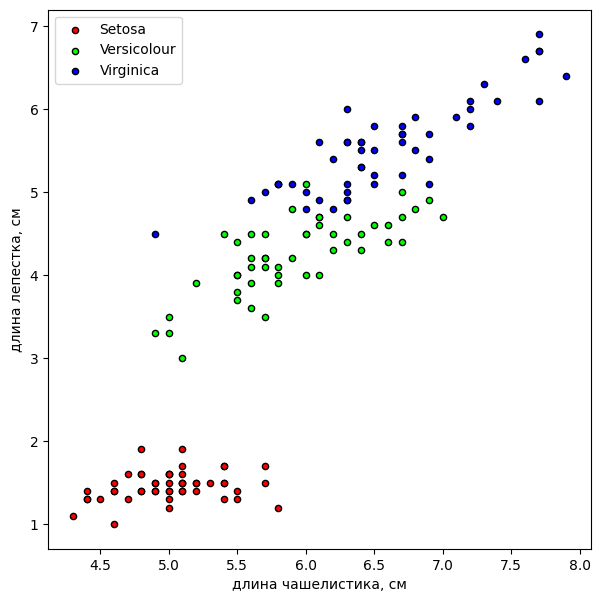

In [66]:
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000',  '#00FF00', '#0000FF'])

K = 3
x = X[-1]

fig, ax = plt.subplots(figsize=(7,7))
for i, iris_class in enumerate(['Setosa', 'Versicolour', 'Virginica']):
    idx = y==i
    ax.scatter(X[idx,0], X[idx,2], 
               c=cmap_bold.colors[i], edgecolor='k', 
               s=20, label=iris_class);

ax.set(xlabel='длина чашелистика, см', ylabel='длина лепестка, см')
ax.legend();

## 3. Обучим модели дерево решений

### 3.1. Дерево решений с критерием "Индекс Джини"

In [67]:
# Создадим объект Decision Tree
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=0)

# Обучение модели
clf_gini.fit(X_train, y_train)

# Прогноз на тестовых данных
y_pred_gini = clf_gini.predict(X_test)

In [68]:
# точность модели на тестовых данных
accuracy = accuracy_score(y_test, y_pred_gini)*100
print('Точность модели на тестовой выборке: ' + str(round(accuracy, 2)) + ' %.')

Точность модели на тестовой выборке: 97.78 %.


In [69]:
# посмотрим на метрики на обучающей выборке
y_pred_train_gini = clf_gini.predict(X_train)

accuracy = accuracy_score(y_train, y_pred_train_gini)*100
print('Точность модели на обучающей выборке: ' + str(round(accuracy, 2)) + ' %.')

Точность модели на обучающей выборке: 94.29 %.


### Визуализируем полученное дерево решений

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'x[2] <= 4.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.214\nsamples = 41\nvalue = [0, 5, 36]')]

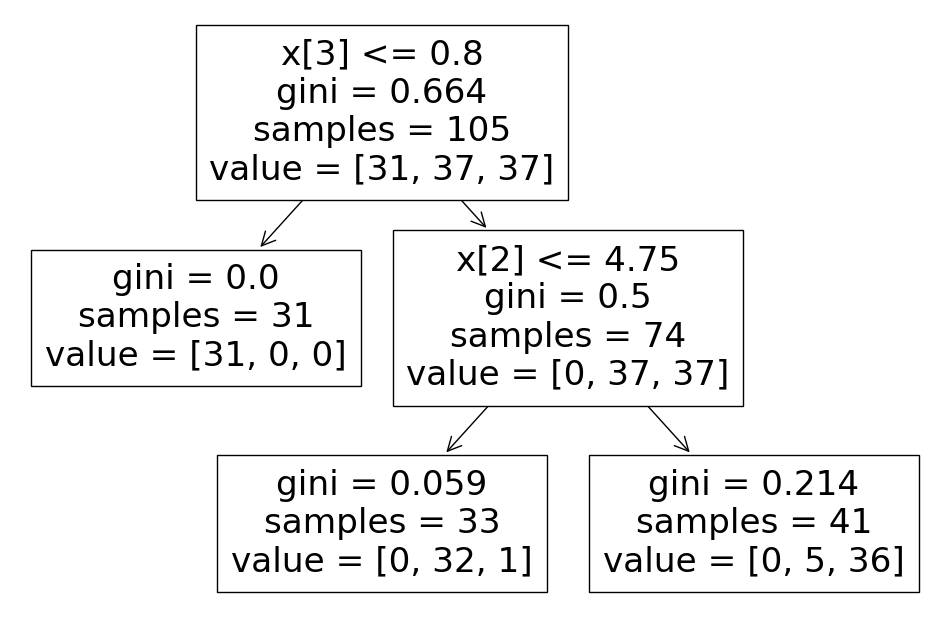

In [70]:
plt.figure(figsize=(12,8))

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

А теперь давайте визуализируем границы классов. Для этого выберем первые 2 признака для обучения модели и покажем как выглядят границы принятия решения.

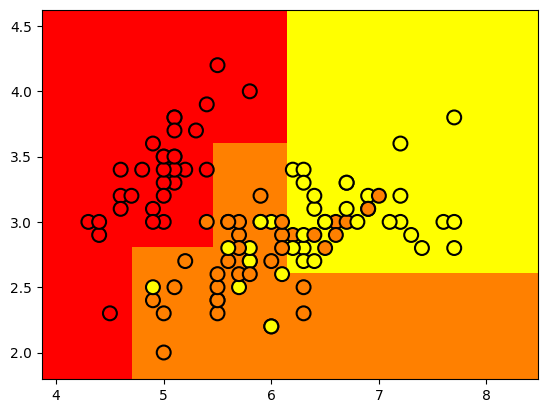

In [71]:
X_2d = X[:,0:2]

X_2d_train, X_2d_test, y_2d_train, y_2d_test = train_test_split(X_2d, y, test_size = 0.3, random_state = 42)

# Создадим объект Decision Tree
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# Обучение модели
clf_gini.fit(X_2d_train, y_2d_train)

# Прогноз на тестовых данных
y_pred_gini = clf_gini.predict(X_2d_test)

# Напишем вспомогательную функцию, которая будет возвращать решетку для дальнейшей визуализации.
def get_grid(data):
    x_min, x_max = X_2d_train[:, 0].min()*0.9, X_2d_train[:, 0].max()*1.1
    y_min, y_max = X_2d_train[:, 1].min()*0.9, X_2d_train[:, 1].max()*1.1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# немного кода для отображения разделяющей поверхности
xx, yy = get_grid(X_2d_test)
y_pred = clf_gini.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, y_pred, cmap='autumn')
plt.scatter(X_2d_train[:, 0], X_2d_train[:, 1], 
            c=y_2d_train, s=100, cmap='autumn', 
            edgecolors='black', linewidth=1.5
);

### 3.2. Дерево решений с критерием "Информационная энтропия"

In [72]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# Обучение модели
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [73]:
y_pred_en = clf_en.predict(X_test)

In [74]:
accuracy = accuracy_score(y_test, y_pred_en)*100
print('Точность модели на тестовой выборке: ' + str(round(accuracy, 2)) + ' %.')

Точность модели на тестовой выборке: 97.78 %.


In [75]:
# посмотрим на метрики на обучающей выборке
y_pred_train_en = clf_en.predict(X_train)

accuracy = accuracy_score(y_train, y_pred_train_en)*100
print('Точность модели на обучающей выборке: ' + str(round(accuracy, 2)) + ' %.')

Точность модели на обучающей выборке: 95.24 %.


### Визуализируем работу алгоритма

[Text(0.375, 0.875, 'x[3] <= 0.8\nentropy = 1.58\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5, 0.625, 'x[2] <= 4.75\nentropy = 1.0\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.25, 0.375, 'x[3] <= 1.6\nentropy = 0.196\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(0.125, 0.125, 'entropy = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.375, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.75, 0.375, 'x[2] <= 5.15\nentropy = 0.535\nsamples = 41\nvalue = [0, 5, 36]'),
 Text(0.625, 0.125, 'entropy = 0.918\nsamples = 15\nvalue = [0, 5, 10]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 26\nvalue = [0, 0, 26]')]

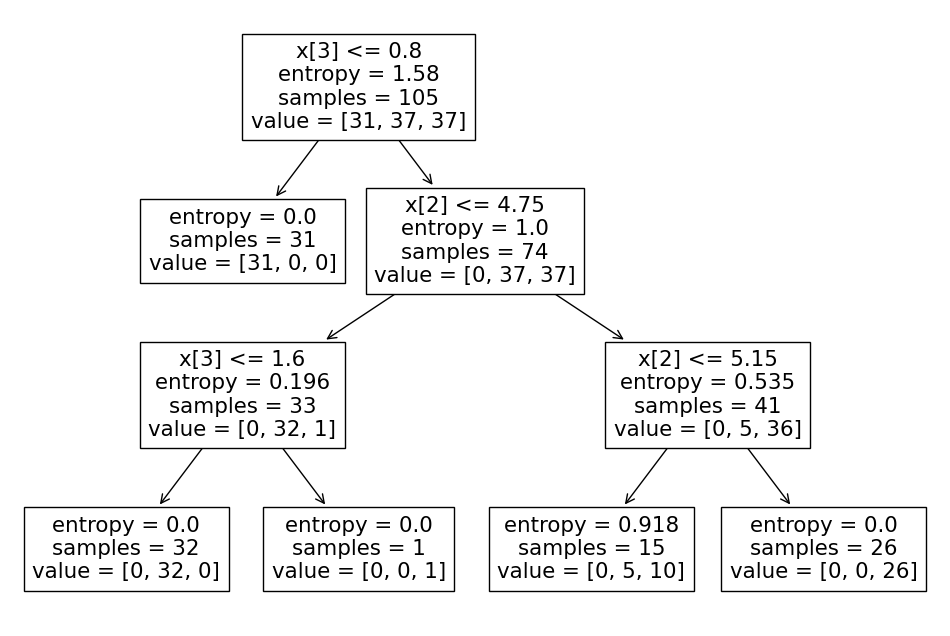

In [76]:
plt.figure(figsize=(12,8))

tree.plot_tree(clf_en.fit(X_train, y_train)) 

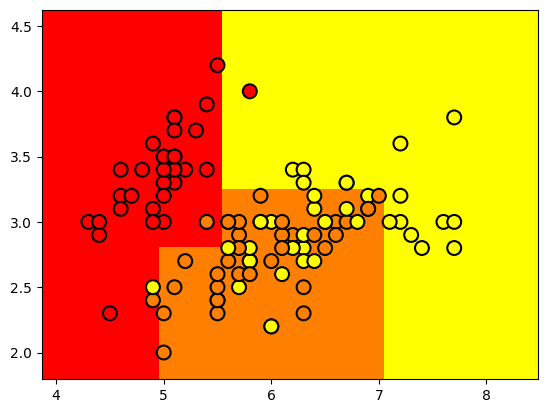

In [77]:
X_2d = X[:,0:2]

X_2d_train, X_2d_test, y_2d_train, y_2d_test = train_test_split(X_2d, y, test_size = 0.3, random_state = 42)

# Создадим объект Decision Tree
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# Обучение модели
clf_en.fit(X_2d_train, y_2d_train)

# Прогноз на тестовых данных
y_pred_gini = clf_en.predict(X_2d_test)

# Напишем вспомогательную функцию, которая будет возвращать решетку для дальнейшей визуализации.
def get_grid(data):
    x_min, x_max = X_2d_train[:, 0].min()*0.9, X_2d_train[:, 0].max()*1.1
    y_min, y_max = X_2d_train[:, 1].min()*0.9, X_2d_train[:, 1].max()*1.1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# немного кода для отображения разделяющей поверхности
xx, yy = get_grid(X_2d_test)
y_pred = clf_en.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, y_pred, cmap='autumn')
plt.scatter(X_2d_train[:, 0], X_2d_train[:, 1], 
            c=y_2d_train, s=100, cmap='autumn', 
            edgecolors='black', linewidth=1.5
);

## 4. Выведем отчет о моделях

In [78]:
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [79]:
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       0.50      0.85      0.63        13
           2       0.33      0.15      0.21        13

    accuracy                           0.67        45
   macro avg       0.61      0.63      0.59        45
weighted avg       0.66      0.67      0.64        45



# 5. GridSearchCV

Как и в предыдущих алгоритмах, в решающих деревьях также много гиперпараметров, которые необходимо задать до обучения модели. Для выбора значений этих параметров также можно использовать `GridSearchCV`. Рассмотрим на хрестоматийном примере Титаник. Данные предварительно очищены и подготовлены для работы моделями.

- `Survived` - выжил/не выжил
- `Age` - возраст 
- `Fare` - стоимость билета 
- `C`,`Q` - порт посадки. Если оба значения =0, то третий порт `S` 
- `Family` - наличие семьи на борту
- `Child`, `Female` - пол (М, Ж, ребенок). Если ни `Child` ни `Female`, то `Male`
- `Class_1`, `Class_2` - класс каюты. Если ни `Class_1` ни `Class_2`, тогда `Class_3`

In [80]:
# Чтение данных
titanic_dataframe = pd.read_pickle('data/titanic_clean.pickle')

In [81]:
titanic_dataframe.head()

,Survived,Pclass,Age,Fare,C,Q,Family,Child,Female
0,0,3,22.0,7,False,False,1,False,False
1,1,1,38.0,71,True,False,1,False,True
2,1,3,26.0,7,False,False,0,False,True
3,1,1,35.0,53,False,False,1,False,True
4,0,3,35.0,8,False,False,0,False,False


In [82]:
titanic_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       714 non-null    float64
 3   Fare      891 non-null    int64  
 4   C         891 non-null    bool   
 5   Q         891 non-null    bool   
 6   Family    891 non-null    int64  
 7   Child     891 non-null    bool   
 8   Female    891 non-null    bool   
dtypes: bool(4), float64(1), int64(4)
memory usage: 38.4 KB


In [83]:
titanic_dataframe.describe()

,Survived,Pclass,Age,Fare,Family
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,31.785634,0.397306
std,0.486592,0.836071,14.526497,49.703730,0.489615
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,7.000000,0.000000
50%,0.000000,3.000000,28.000000,14.000000,0.000000
75%,1.000000,3.000000,38.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,512.000000,1.000000


In [84]:
# количество пропущенных значений
titanic_dataframe.isna().sum()

Survived      0
Pclass        0
Age         177
Fare          0
C             0
Q             0
Family        0
Child         0
Female        0
dtype: int64

In [85]:
X = titanic_dataframe.drop("Survived", axis=1)
y = titanic_dataframe["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 22)

> # Задание 
>
> При помощи GridSearchCV найти наилучшее сочетание параметров `criterion`: ('gini', 'entropy'), `min_samples_split`: (3,5,8,10), `min_samples_leaf`: (1,3,5,7), `max_depth`: (3,4,5,6,7,8). Значения для DecisionTreeClassifier `max_features`='auto', `random_state`=22

In [86]:
from sklearn import tree

# получаю классификатор
DTree_clf = tree.DecisionTreeClassifier(random_state=22)
DTree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=22)

[Text(0.4351851851851852, 0.9722222222222222, 'x[7] <= 0.5\ngini = 0.473\nsamples = 712\nvalue = [439, 273]'),
 Text(0.39814814814814814, 0.9166666666666666, 'x[1] <= 15.5\ngini = 0.447\nsamples = 500\nvalue = [392, 108]'),
 Text(0.3611111111111111, 0.8611111111111112, 'gini = 0.474\nsamples = 70\nvalue = [27, 43]'),
 Text(0.4351851851851852, 0.8611111111111112, 'x[0] <= 1.5\ngini = 0.257\nsamples = 430\nvalue = [365, 65]'),
 Text(0.18518518518518517, 0.8055555555555556, 'x[1] <= 51.5\ngini = 0.424\nsamples = 95\nvalue = [66, 29]'),
 Text(0.1111111111111111, 0.75, 'x[1] <= 41.0\ngini = 0.477\nsamples = 56\nvalue = [34, 22]'),
 Text(0.07407407407407407, 0.6944444444444444, 'x[1] <= 28.5\ngini = 0.472\nsamples = 37\nvalue = [24, 13]'),
 Text(0.037037037037037035, 0.6388888888888888, 'gini = 0.5\nsamples = 18\nvalue = [10, 8]'),
 Text(0.1111111111111111, 0.6388888888888888, 'x[5] <= 0.5\ngini = 0.332\nsamples = 19\nvalue = [14, 5]'),
 Text(0.07407407407407407, 0.5833333333333334, 'gini = 

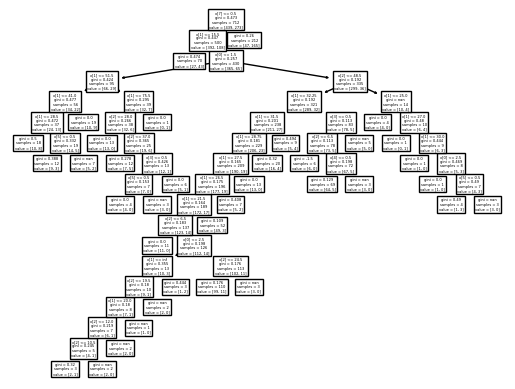

In [87]:
# печатаю дерево решений
tree.plot_tree(DTree_clf)

In [90]:
from sklearn.model_selection import GridSearchCV
# задаем словарь параметров для модели SVM, которые мы хотим варьироать в рамках
# работы GridSearchCV

parameters = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [3, 5, 8, 10],
    'min_samples_leaf': [1, 3, 5, 7],
    'max_depth': [3, 4, 5, 6, 7, 8]
}

grid = GridSearchCV(DTree_clf, parameters, cv=3)
# Fit the data to find the best combination of parameters
grid.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters: ", grid.best_params_)
print("Best Score: ", grid.best_score_)

Best Parameters:  {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 3}
Best Score:  0.817478046070749
